<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JSOrtegaB/blob/main/Semana8/Semana8_Modulo5_DataAnalisis_IBM_JuanSebastianOrtegaBriones_A01794327.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semana 8: Data Analysis with Python (IBM) Módulo 5
## Ciencia y analítica de datos
### Profesor: María de la Paz Rico Fernández
### Juan Sebastián Ortega Briones A01794327

# Desarrollo

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')


In [2]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df=pd.read_csv(url)

In [3]:
df=df._get_numeric_data()
df.head(5)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [4]:
df.dropna(subset=['price'], inplace=True)


### Funciones para graficar

In [5]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [6]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()


## Part 1: Training and Testing

In [7]:
y_data = df['price']
x_data=df.drop('price',axis=1)

In [8]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
print("number of samples:",x_data.shape[0])


number of test samples : 21
number of training samples: 180
number of samples: 201


Regresion lineal y calculo de R para train y test

In [9]:
from sklearn.linear_model import LinearRegression
lre=LinearRegression()
lre.fit(x_train[['horsepower']], y_train)
print("train (X):",lre.score(x_train[['horsepower']], y_train))
print("test (R):",lre.score(x_test[['horsepower']], y_test))

train (X): 0.6619724197515104
test (R): 0.36358755750788263


In [13]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.40, random_state=1)


print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

lre1=LinearRegression()
lre1.fit(x_train1[['horsepower']], y_train1)
print("Score para test 1:",lre.score(x_test1[['horsepower']], y_test1))
print("Score pata train 1: ",lre.score(x_train1[['horsepower']], y_train1))

number of test samples : 81
number of training samples: 120
Score para test 1: 0.6117849473757495
Score pata train 1:  0.6751936841601799


### Cross-Validation Score

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [16]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [17]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


In [20]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature:

In [21]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
print(Rcross)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

[0.59015621 0.44319613]
The mean of the folds are 0.5166761697127429 and the standard deviation is 0.07348004195771385


In [22]:
from sklearn.model_selection import cross_val_predict

### Predecir usando cross_val_predict

In [23]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

## Part 2: Overfitting, Underfitting and Model Selection

Let's create Multiple Linear Regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features

In [24]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [25]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [28]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

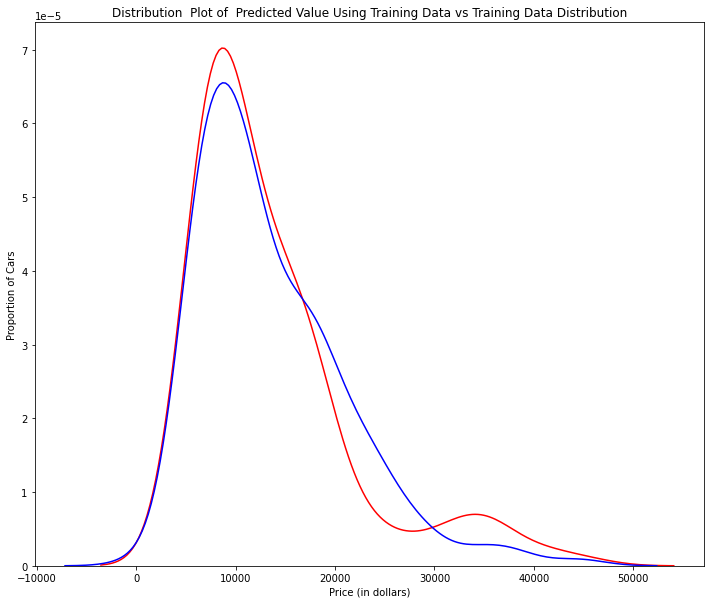

In [32]:

Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

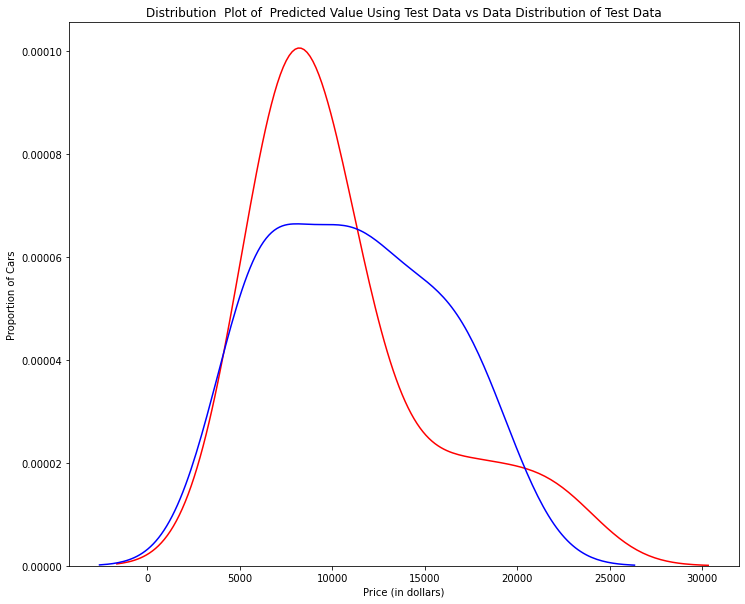

In [33]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [36]:
pr = PolynomialFeatures(degree=3)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=3)

In [37]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [38]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 7689.89346184,  8117.43110872, 11310.88511103, 20124.08726944,
       20775.22938926])

In [39]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 7689.89346184  8117.43110872 11310.88511103 20124.08726944]
True values: [ 6295. 10698. 13860. 13499.]


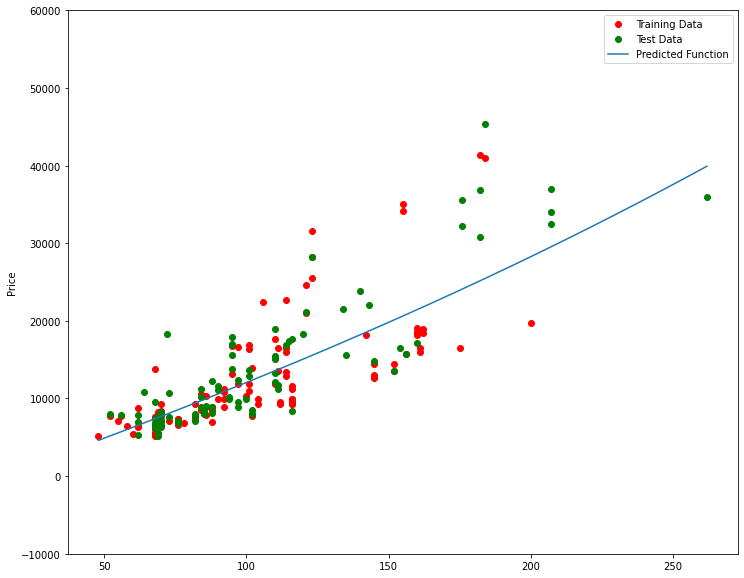

In [40]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [41]:
poly.score(x_train_pr, y_train)

0.5330031006348542

In [42]:
poly.score(x_test_pr, y_test)

0.7406204232729607

Text(3, 0.75, 'Maximum R^2 ')

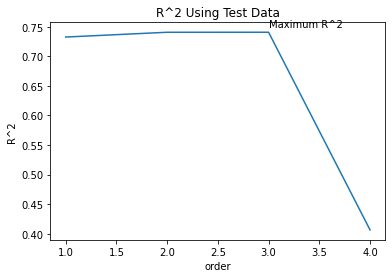

In [43]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [44]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [45]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [46]:
pr1= PolynomialFeatures(degree=2)
pr1.degree

2

In [47]:
x_train_pr1 = pr1.fit_transform(x_train[['horsepower','curb-weight', 'engine-size','highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower','curb-weight', 'engine-size','highway-mpg']])

In [48]:
print("Train shape",x_train_pr1.shape)
print("Test shape",x_test_pr1.shape)

Train shape (110, 15)
Test shape (91, 15)


In [49]:
poly1=LinearRegression()
poly1.fit(x_train_pr1,y_train)

LinearRegression()

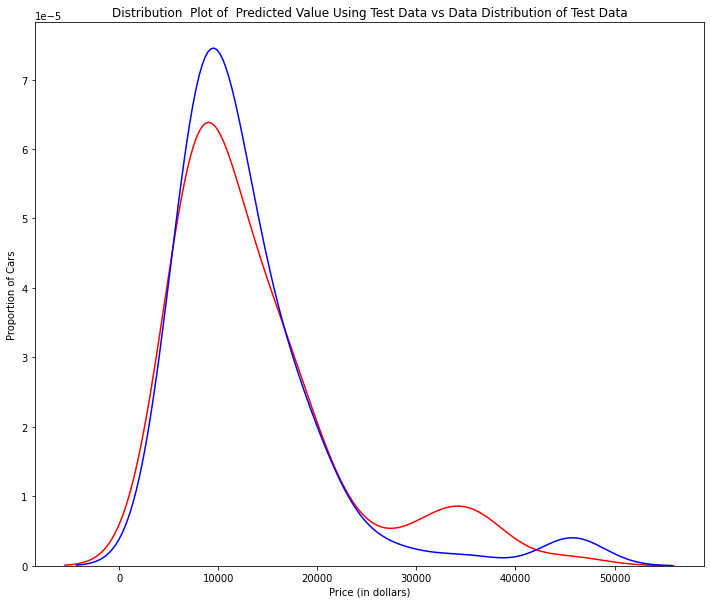

In [50]:
yhat_test1=poly1.predict(x_test_pr1)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)


En el rango de los 10K es mas alto el precio y en el rango de 30K a 40K es menor el predecido

## Part 3: Ridge Regression

In [51]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [52]:
from sklearn.linear_model import Ridge

In [53]:
RigeModel=Ridge(alpha=1)

In [54]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [55]:
yhat = RigeModel.predict(x_test_pr)

In [58]:
print('predicted:', yhat[0:4].round(2))
print('test set :', y_test[0:4].values.round(2))

predicted: [ 6570.82  9636.25 20949.92 19403.6 ]
test set : [ 6295. 10698. 13860. 13499.]


In [59]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:08<00:00, 119.66it/s, Test Score=0.564, Train Score=0.859]


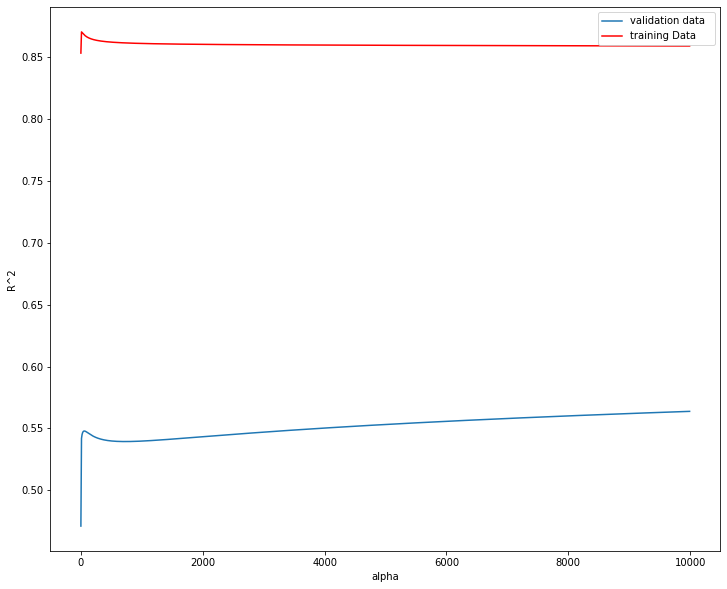

In [60]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [61]:
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440206702

## Part 4: Grid Search

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [64]:
RR=Ridge()
RR

Ridge()

In [65]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [66]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [67]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [68]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151

# Graded Review Questions

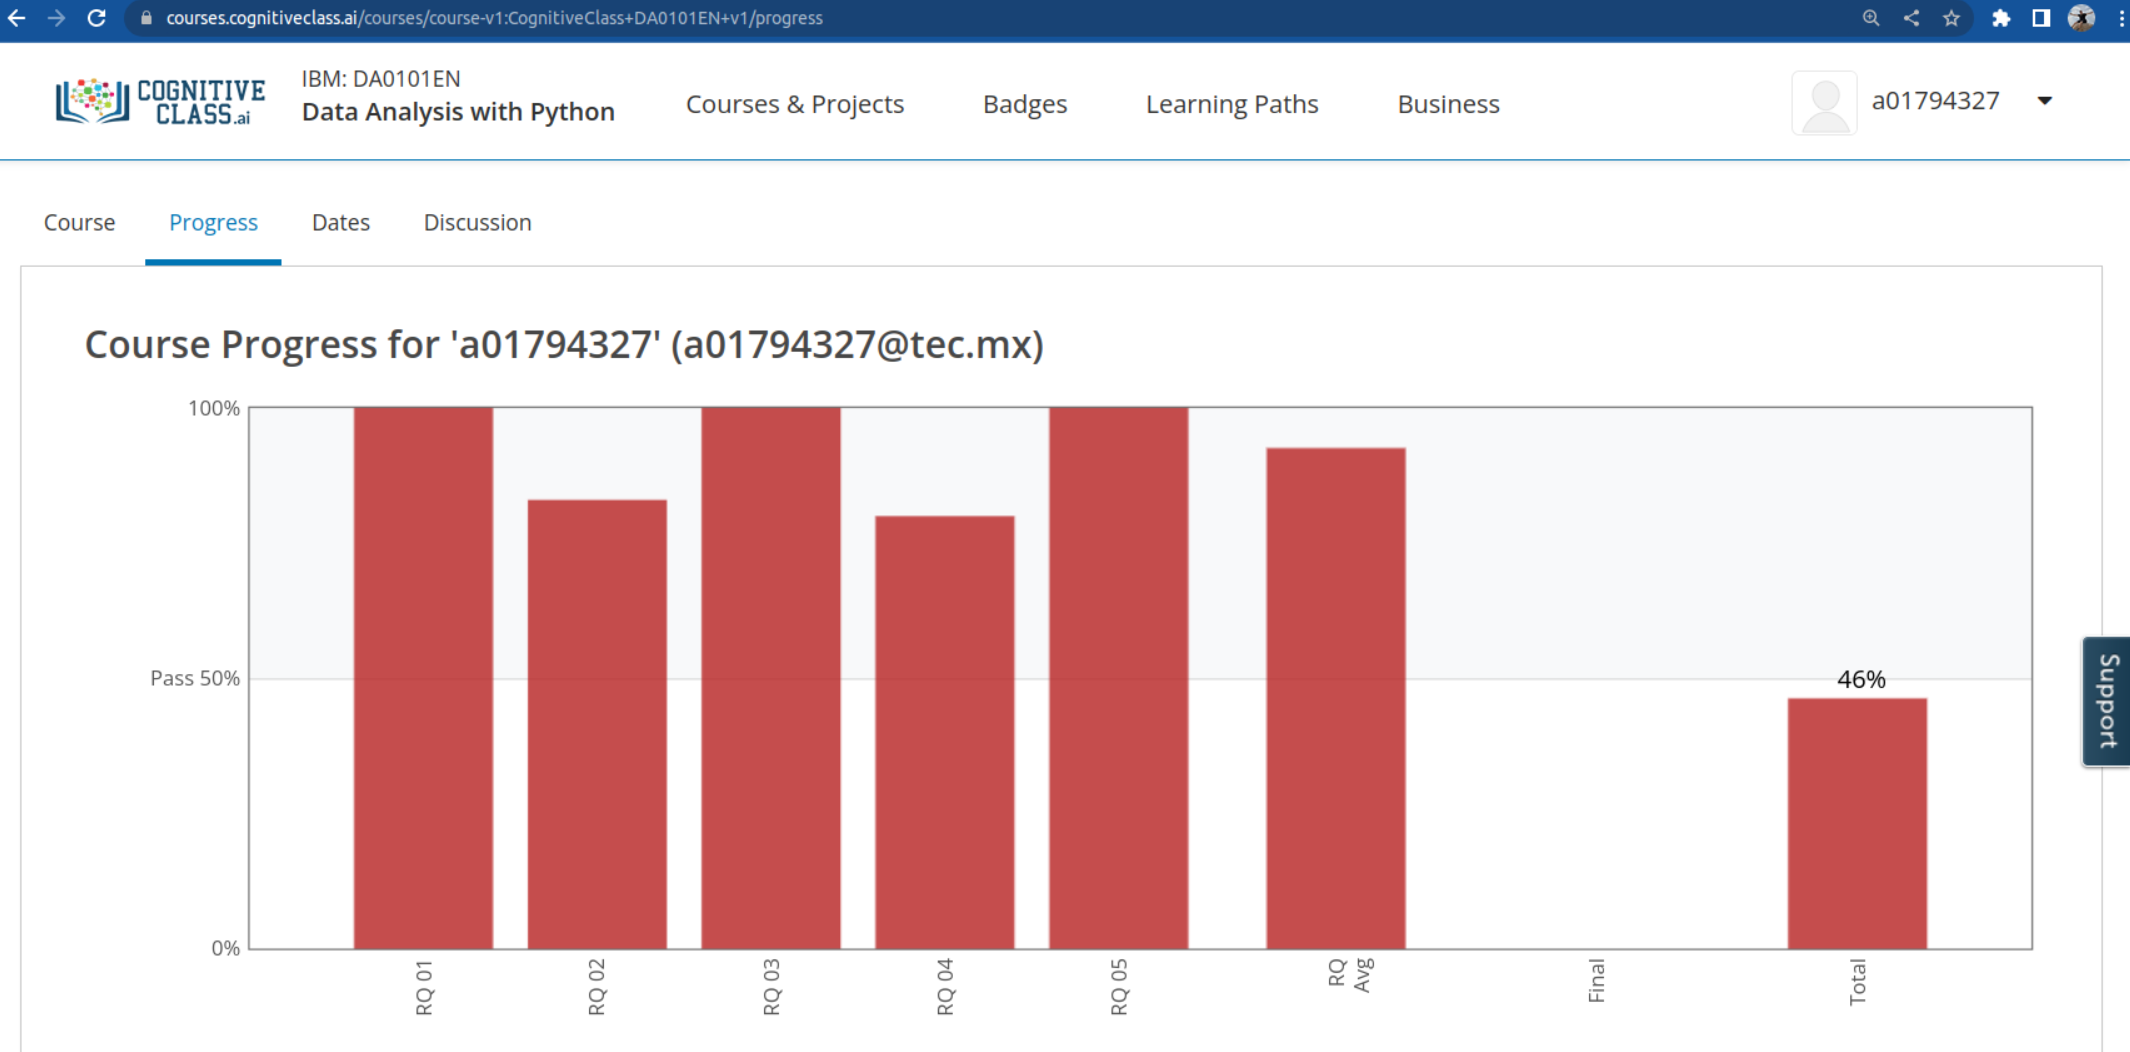

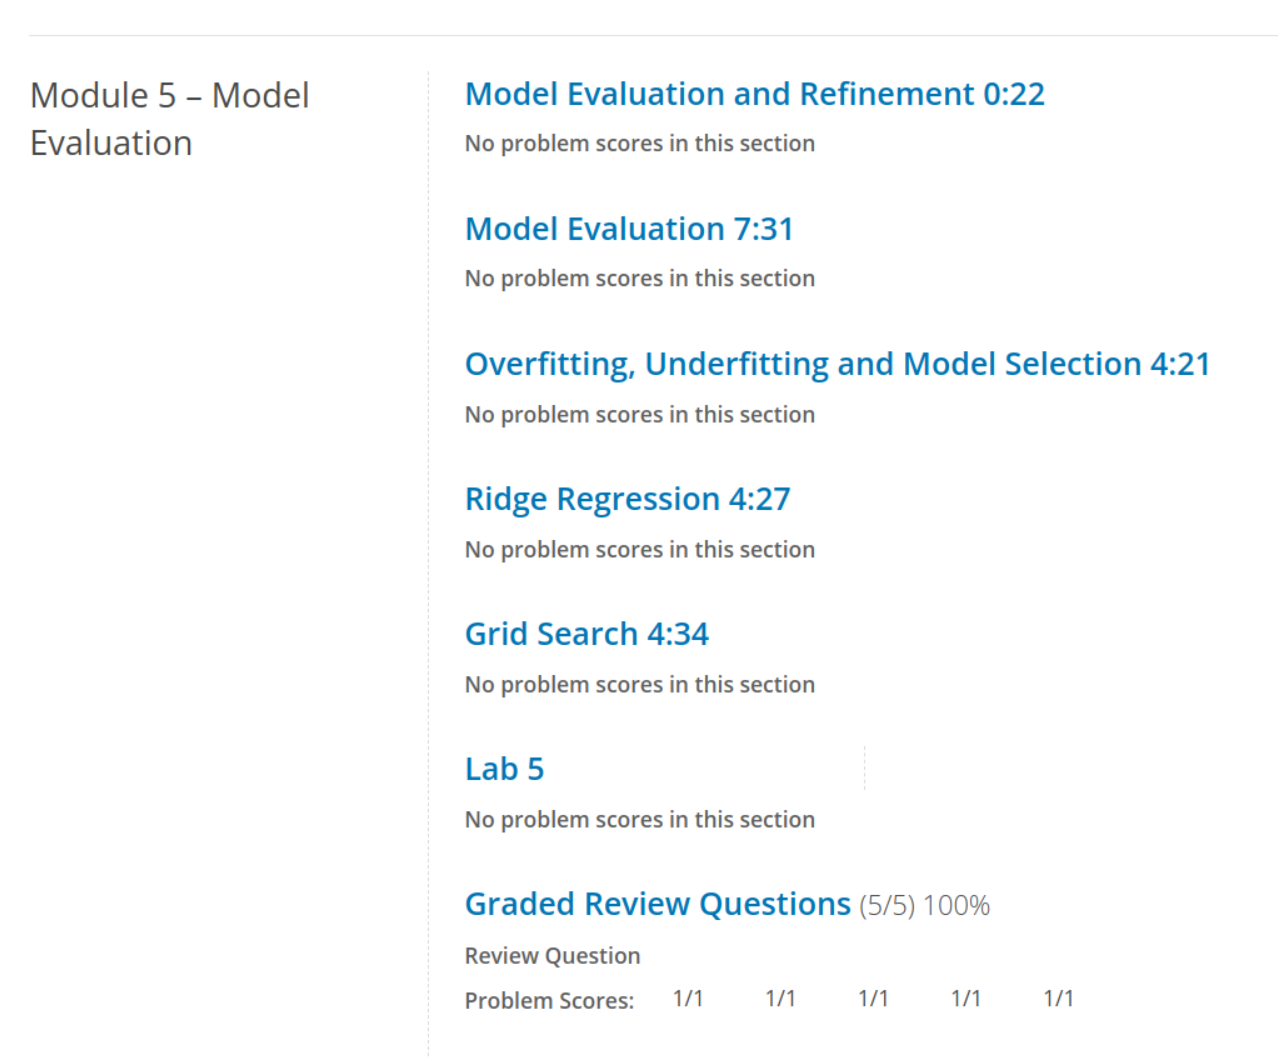

# Evidencias

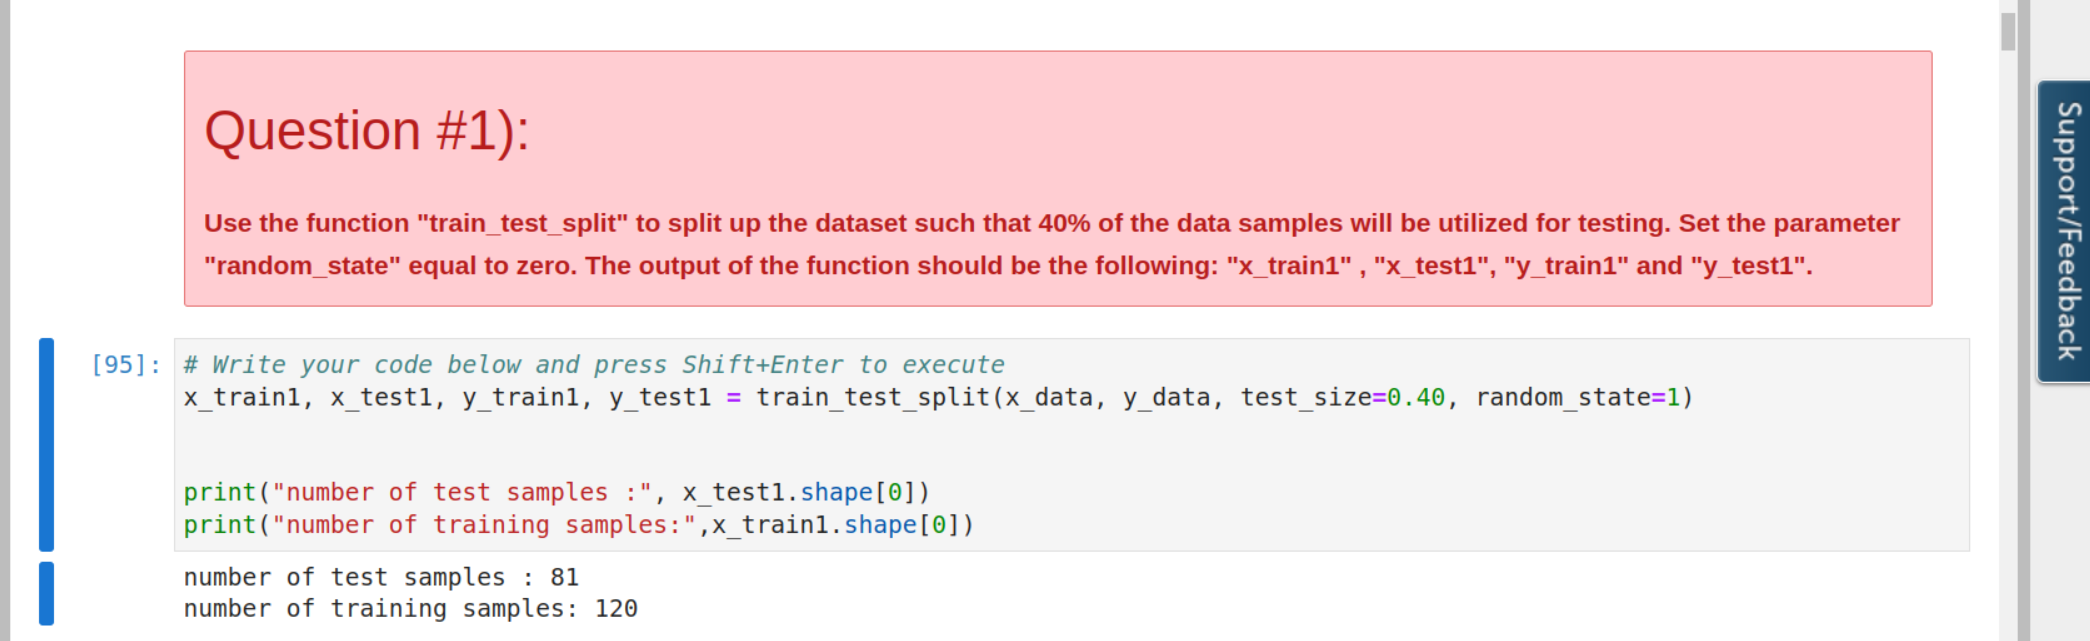

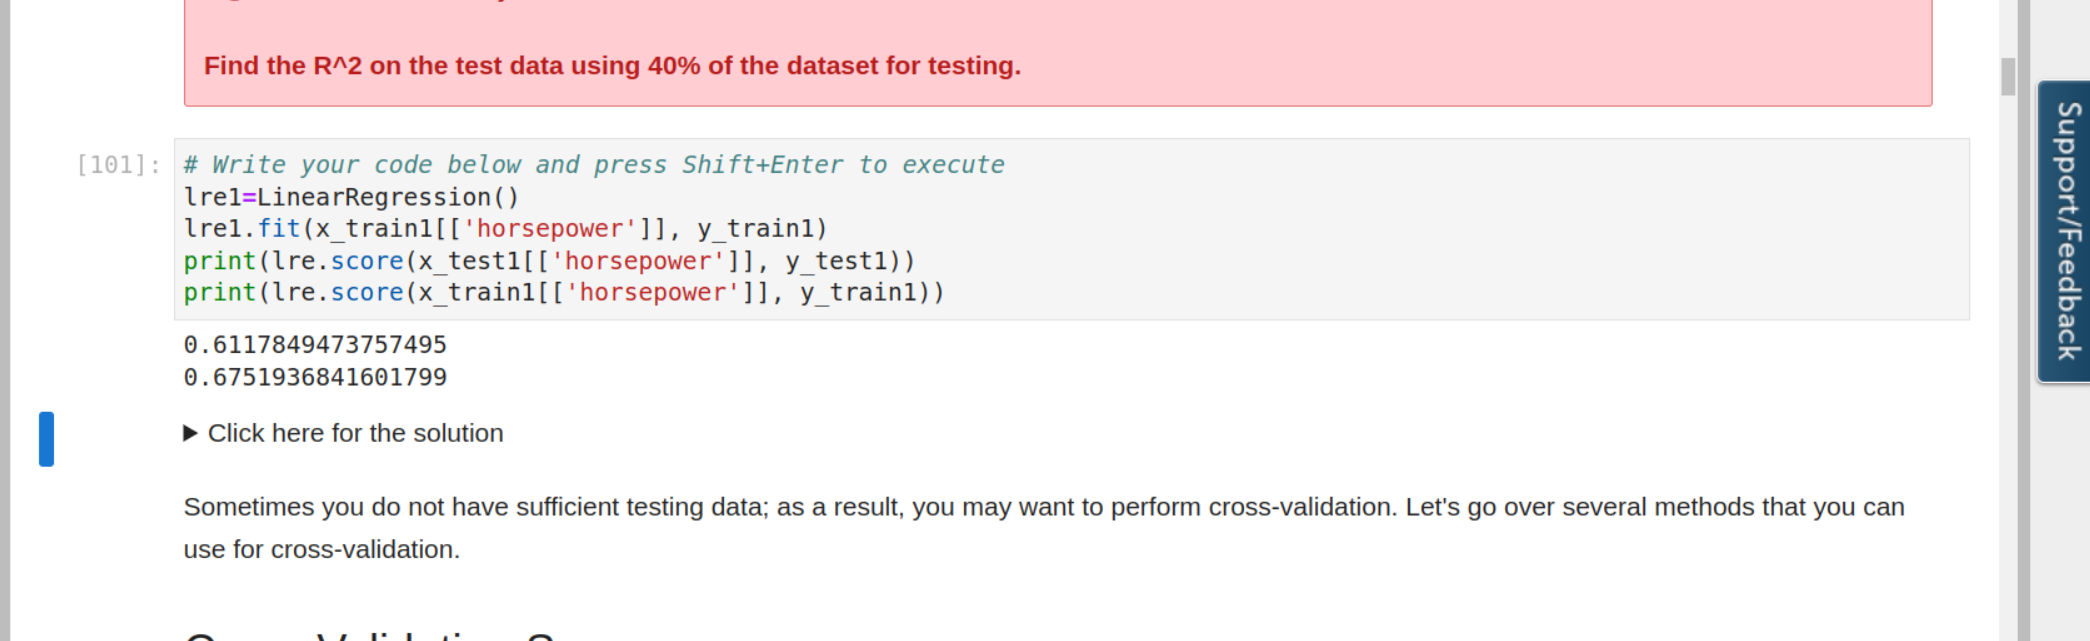

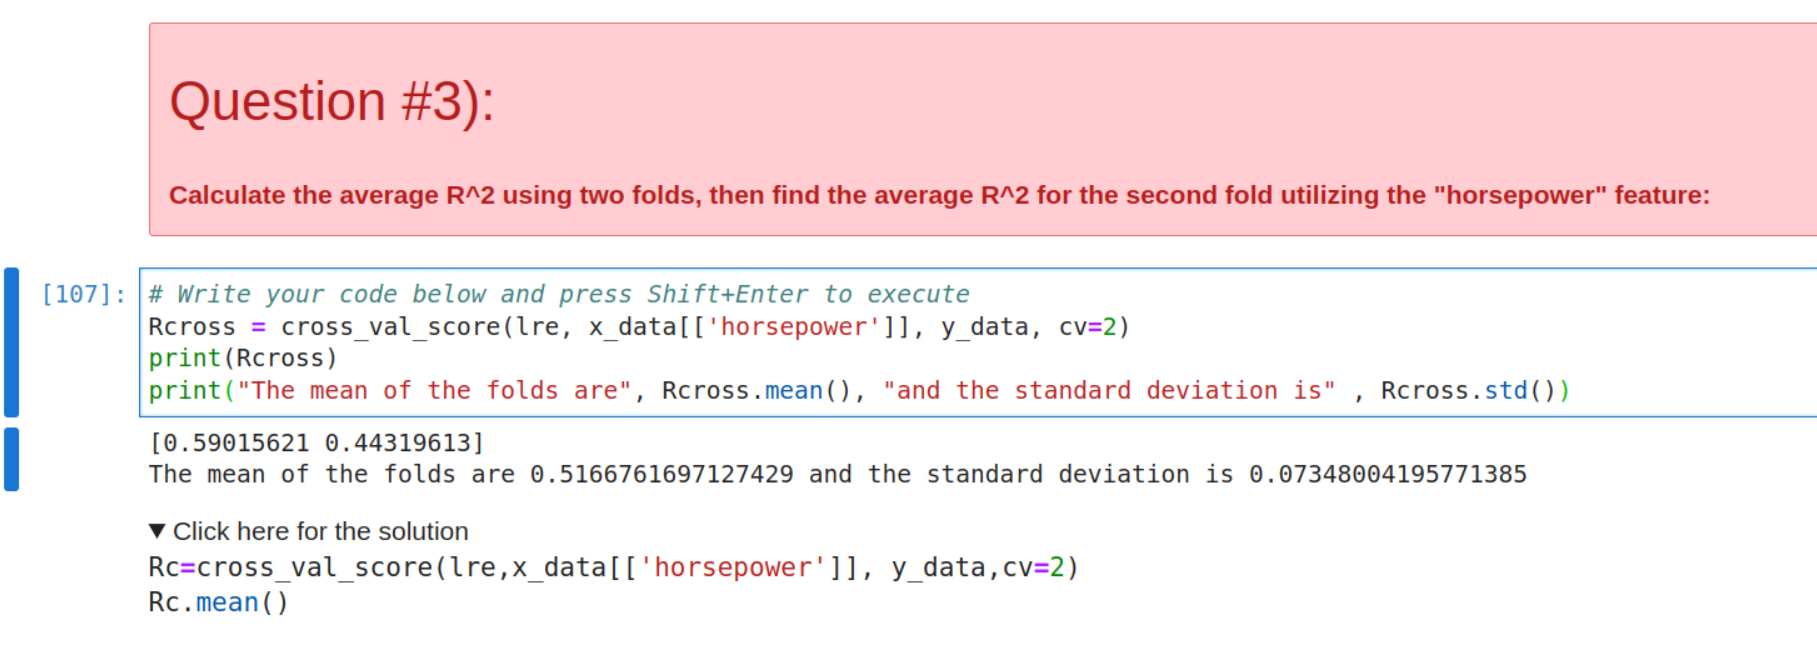

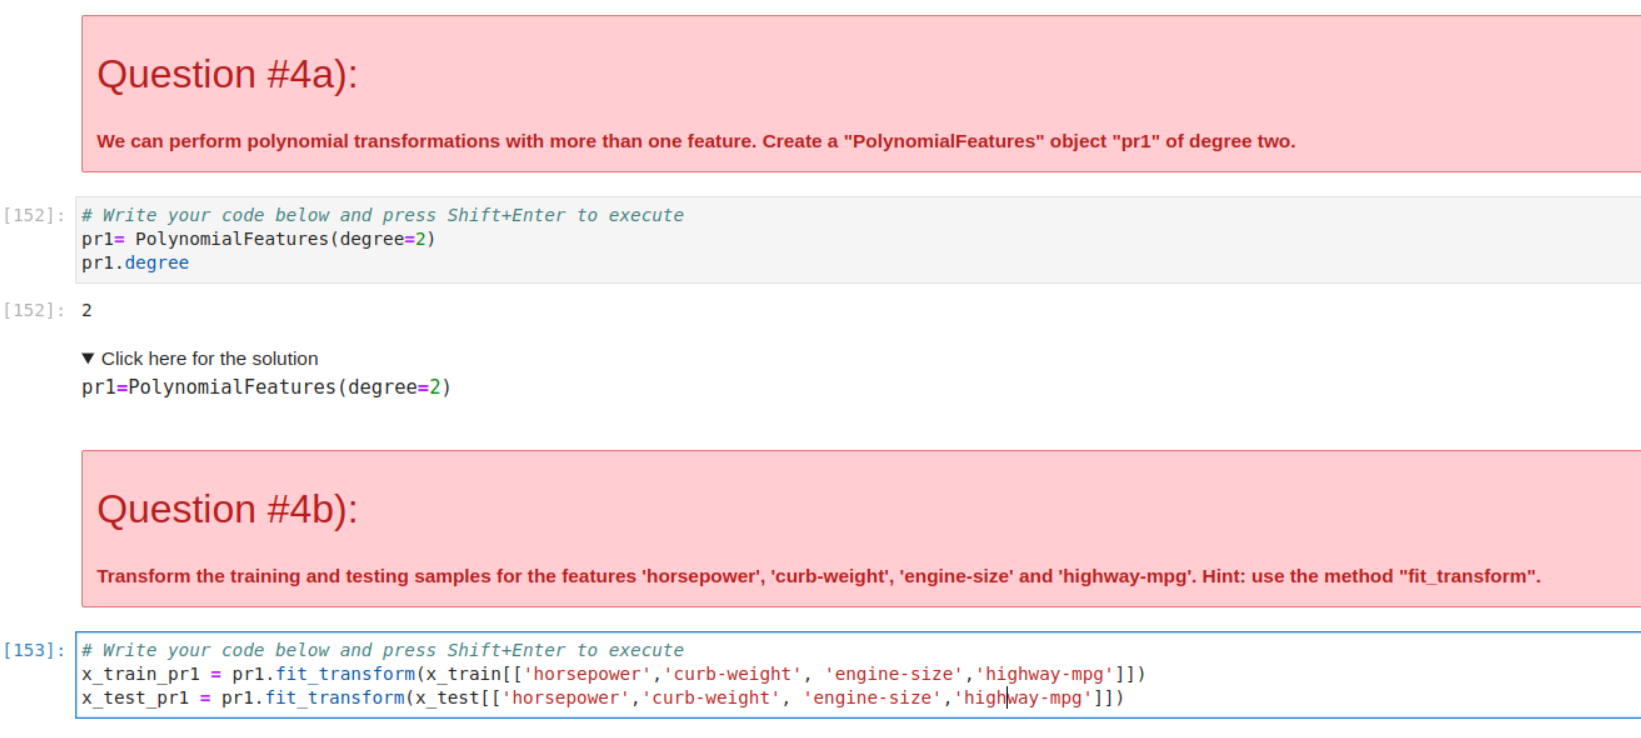

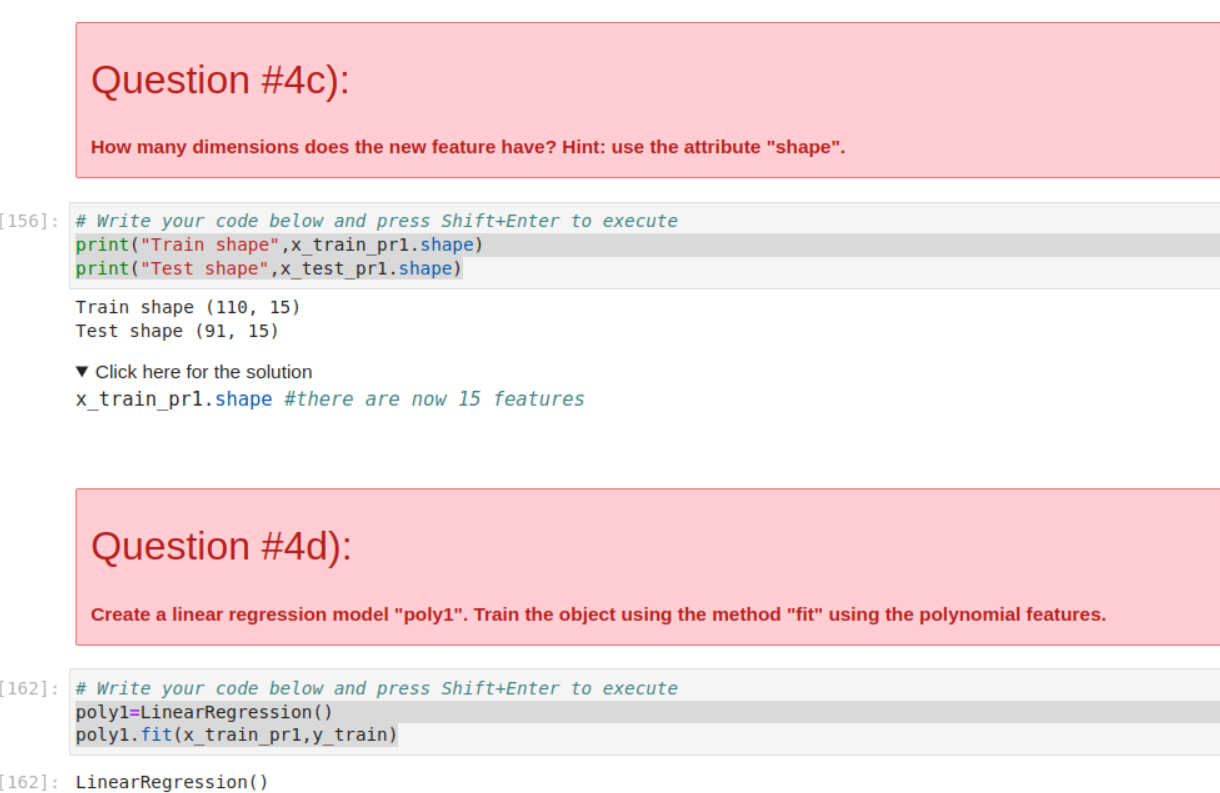

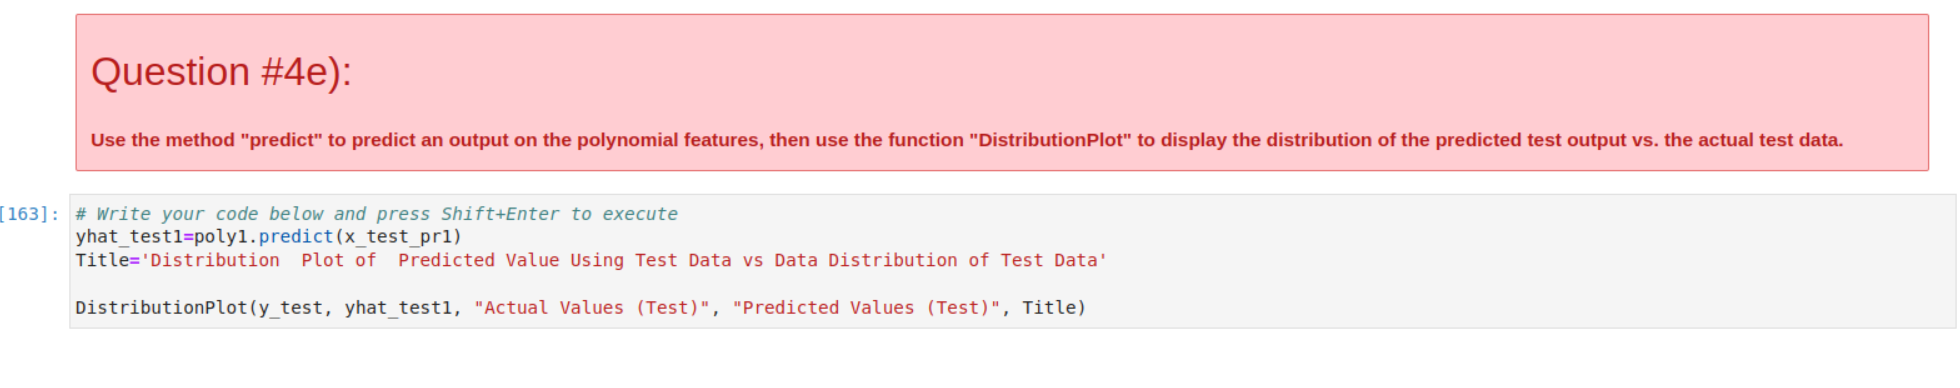

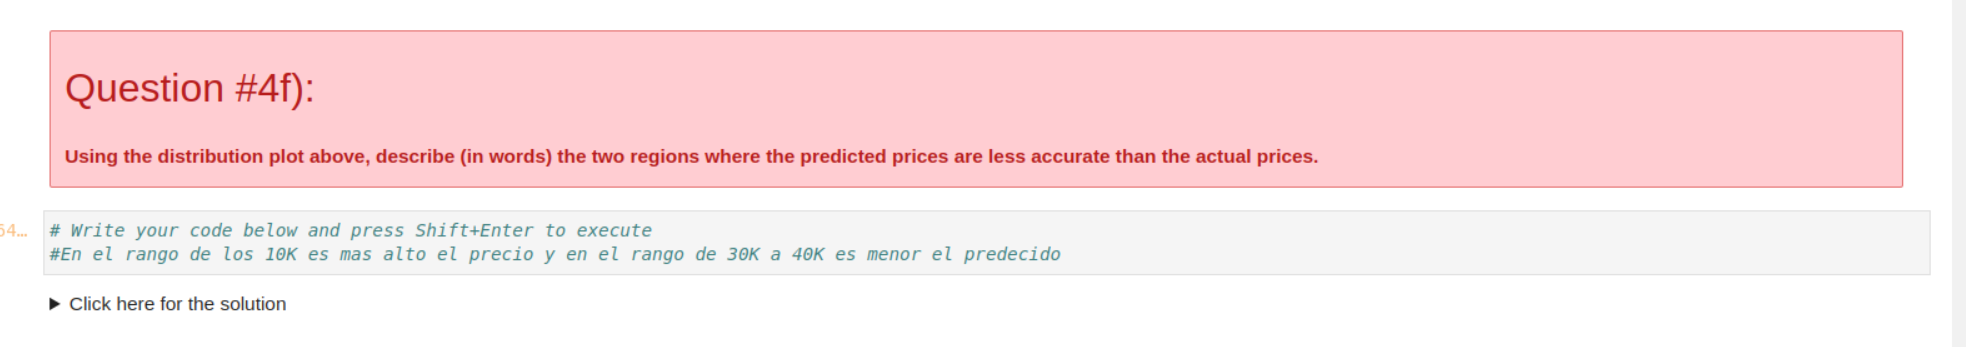

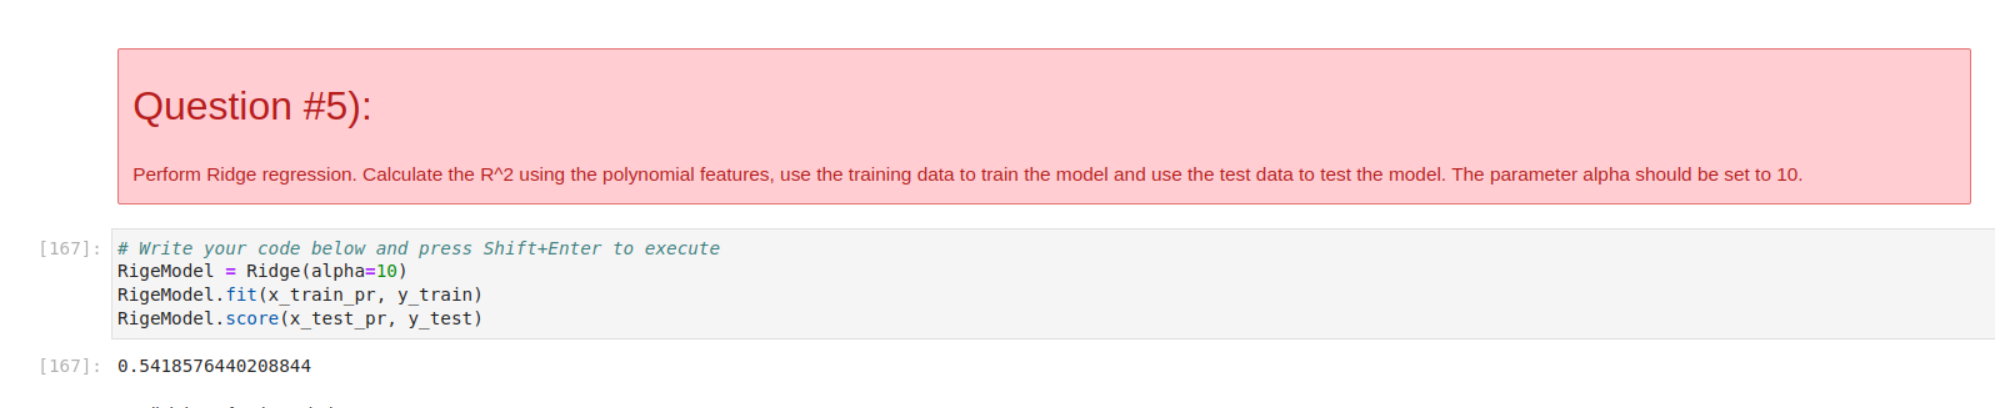